## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
TotalTable=pd.merge(mouse_metadata, study_results, on ="Mouse ID")
# Display the data table for preview
TotalTable

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
#show totals-appears no NA's in table to clear
TotalTable.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Checking the number of mice.
Mouse=TotalTable["Mouse ID"].value_counts()
Mousecount=len(Mouse)
Mousecount

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# This finds the duplicates
#DupeValues=TotalTable[TotalTable.duplicated(['Mouse ID', 'Timepoint'])]
#DupeValues


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#Alternate that both find and drops the duplicates in one line
DV=TotalTable.drop_duplicates(['Mouse ID', 'Timepoint'])
DV
#Appears correct now only 1888 rows v. 1893 that we started with

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [7]:
# Checking the number of mice in the clean DataFrame.
# Number is the same, so nothing was delted incorrectly
Mouse=DV["Mouse ID"].value_counts()
Mousecount=len(Mouse)
Mousecount

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

VolMean= DV.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
VolMed=DV.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
VolVar=DV.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
VolStd=DV.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
VolSEM=DV.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

StatDF=pd.DataFrame({'Mean':VolMean, 'Median':VolMed, 'Variance':VolVar, 'Standard Deviation':VolStd, 'SEM':VolSEM})
StatDF


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#THis is a duplicate instruction
# Using the aggregation method, produce the same summary statistics in a single line
#I don't understand this instruction


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

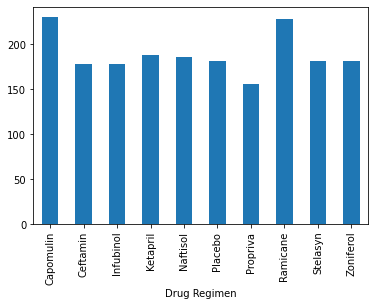

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
TotalTimePointsPerRegimen =DV.groupby(['Drug Regimen']).count()['Timepoint']
TotalTimePointsPerRegimen.plot.bar()
TotalTimePointsPerRegimen

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot
#this is incorrect, need to come back
#x_axis=DV['Drug Regimen']
#plt.ylim(0,250)
#plt.bar(TotalTimePointsPerRegimen,200)

<AxesSubplot:title={'center':'Gender distribution in Study'}, ylabel='Mouse ID'>

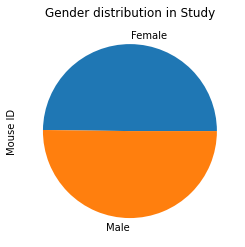

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

Gender =DV.groupby('Sex').nunique()['Mouse ID']

Gender.plot.pie(title='Gender distribution in Study')


Text(0.5, 1.0, 'Gender Distribution in Study')

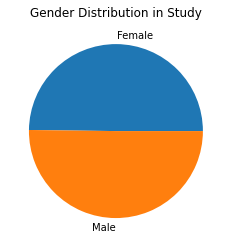

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(Gender, labels=Gender.index)
plt.title('Gender Distribution in Study')

## Quartiles, Outliers and Boxplots

In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

FVolCap=DV.loc[DV['Drug Regimen']=='Capomulin',:]
FVolRam=DV.loc[DV['Drug Regimen']=='Ramicane',:]
FVolInf=DV.loc[DV['Drug Regimen']=='Infubinol',:]
FVolCef=DV.loc[DV['Drug Regimen']=='Ceftamin',:]
FVolCap

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [15]:
# Start by getting the last (greatest) timepoint for each mouse

# Capomulin
CapFinal = FVolCap.groupby('Mouse ID').max()['Timepoint']
FVolCap = pd.DataFrame(CapFinal)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capmerge = pd.merge(FVolCap, DV, on=("Mouse ID","Timepoint"),how="left")



In [16]:
#Ramicane
RamFinal = FVolRam.groupby('Mouse ID').max()['Timepoint']
FVolRam = pd.DataFrame(RamFinal)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Rammerge = pd.merge(FVolRam, DV, on=("Mouse ID","Timepoint"),how="left")


In [17]:
#Infubinol
InfFinal = FVolInf.groupby('Mouse ID').max()['Timepoint']
FVolInf = pd.DataFrame(InfFinal)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Infmerge = pd.merge(FVolInf, DV, on=("Mouse ID","Timepoint"),how="left")


In [18]:
#Ceftamin
CefFinal = FVolCef.groupby('Mouse ID').max()['Timepoint']
FVolCef = pd.DataFrame(CefFinal)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Cefmerge = pd.merge(FVolCef, DV, on=("Mouse ID","Timepoint"),how="left")


In [19]:
#Capmerge, Rammerge, Infmerge, Cefmerge
# Put treatments into a list for for loop (and later for plot labels)

#TopTx=['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
#TVD=[]

In [20]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Capomulin
Captumors = Capmerge["Tumor Volume (mm3)"]

quartiles =Captumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [21]:
#Ramicane
# Determine outliers using upper and lower bounds
Ramtumors = Rammerge["Tumor Volume (mm3)"]

quartiles =Ramtumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [22]:
#Infubinol
# Determine outliers using upper and lower bounds

Inftumors = Infmerge["Tumor Volume (mm3)"]

quartiles =Inftumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [23]:
#Ceftamin
    
# Determine outliers using upper and lower bounds
Ceftumors = Cefmerge["Tumor Volume (mm3)"]

quartiles =Ceftumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")    
  
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
The median of Ceftamin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


ValueError: Dimensions of labels and X must be compatible

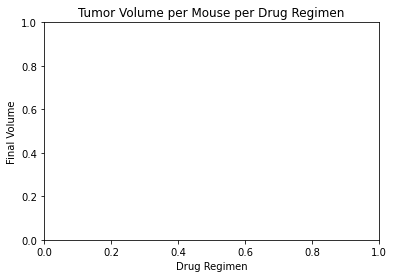

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest----I can't get this to run

BoxPlotData=['Captumors', 'Ramtumors', 'Inftumors', 'Ceftumors']
TopTx=['Capomulin','Ramicane', 'Infubinol', 'Ceftamin']


fig1, ax1 = plt.subplots()

ax1.set_title('Tumor Volume per Mouse per Drug Regimen')
ax1.set_ylabel('Final Volume')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(BoxPlotData, labels=TopTx)

plt.show()



## Line and Scatter Plots

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#Choosing mouse s185 based on head() of prior list
s185=FVolCap.loc[FVolCap['Mouse ID']=='s185', :]
s185.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
